## Test notebook for Data Management Acceptance Test Campaign 1
This test will be executed on the Rubin Science Platform Notebook Aspect at the Interim Data Facility, initialized with Science Pipelines release w_2022_32.

### Test case LVV-T126: Verify implementation of Image Differencing

Verify that the DMS can perform image differencing from single exposures and coadds.

In [1]:
from lsst.daf.butler import Butler

import matplotlib.pyplot as plt
import numpy as np
import os
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('matplotlib')

#### Initialize the butler pointing to DP0.2 data:

In [2]:
# For DP0.2 data on the IDF:                                                                                                           
config = 'dp02'
collection = '2.2i/runs/DP0.2'
butler = Butler(config, collections=collection)

#### Select a single visit for examination

In [3]:
dataId = {'instrument': 'LSSTCam-imSim', 'detector': 78, 'visit': 60891, 'exposure':60891, 'band':'i'}

In [4]:
# extract the calexp image, difference image, and diaSrc catalog
calexp = butler.get('calexp', dataId=dataId)
diffim = butler.get('goodSeeingDiff_differenceExp', dataId=dataId)
diasrc = butler.get('goodSeeingDiff_diaSrc', dataId=dataId)

In [5]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [7, 7],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

#### Examine the images to confirm that the calexp and difference image are both well-formed, and that the visit image contains mostly blank sky.

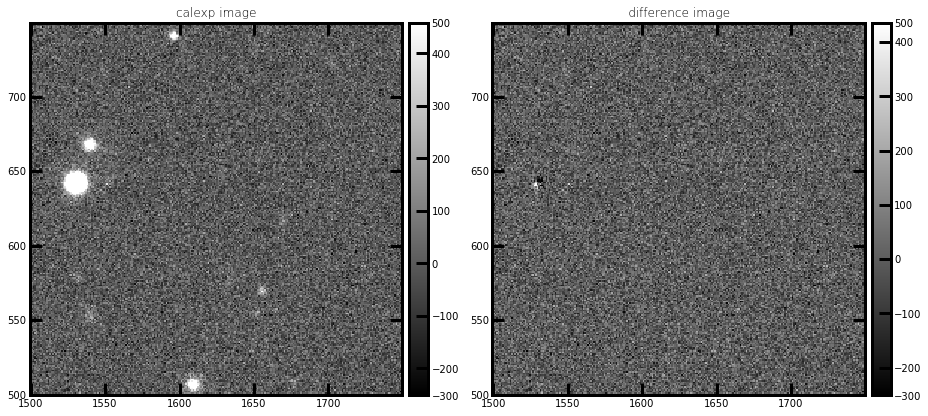

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

plt.sca(ax[0])
display0 = afwDisplay.Display(frame=fig)
display0.scale("linear", "zscale")
display0.mtv(calexp.image[1500:1750, 500:750])
plt.title("calexp image")

plt.sca(ax[1])
display0.scale("linear", "zscale")
display0.mtv(diffim.image[1500:1750, 500:750])
plt.title("difference image")

plt.tight_layout()
plt.show()

#### Confirm that the diaSrc catalog has photometric and astrometric measurements. 

In [7]:
print('Number of columns in source catalog: ', len(diasrc.asAstropy().columns))

diasrc.asAstropy()

Number of columns in source catalog:  270


id,coord_ra,coord_dec,parent,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,slot_Shape_xx,base_SdssShape_yy,slot_Shape_yy,base_SdssShape_xy,slot_Shape_xy,base_SdssShape_xxErr,slot_Shape_xxErr,base_SdssShape_yyErr,slot_Shape_yyErr,base_SdssShape_xyErr,slot_Shape_xyErr,base_SdssShape_x,slot_Shape_x,base_SdssShape_y,slot_Shape_y,base_SdssShape_instFlux,slot_Shape_instFlux,base_SdssShape_instFluxErr,slot_Shape_instFluxErr,base_SdssShape_psf_xx,slot_PsfShape_xx,slot_Shape_psf_xx,base_SdssShape_psf_yy,slot_PsfShape_yy,slot_Shape_psf_yy,base_SdssShape_psf_xy,slot_PsfShape_xy,slot_Shape_psf_xy,base_SdssShape_instFlux_xx_Cov,slot_Shape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,slot_Shape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,slot_Shape_instFlux_xy_Cov,base_SdssShape_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,base_SdssShape_flag_unweightedBad,base_GaussianFlux_flag_badShape_unweightedBad,slot_Shape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_GaussianFlux_flag_badShape_unweighted,slot_Shape_flag_unweighted,base_SdssShape_flag_shift,base_GaussianFlux_flag_badShape_shift,slot_Shape_flag_shift,base_SdssShape_flag_maxIter,base_GaussianFlux_flag_badShape_maxIter,slot_Shape_flag_maxIter,base_SdssShape_flag_psf,base_GaussianFlux_flag_badShape_psf,slot_Shape_flag_psf,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_12_0_instFlux,slot_ApFlux_instFlux,base_CircularApertureFlux_12_0_instFluxErr,slot_ApFlux_instFluxErr,base_Circ

This looks like a well-formed source catalog with 270 columns. 